<a href="https://colab.research.google.com/github/dfdbxf/air-bnb-booking-analysis/blob/main/Copy_of_Airline_passenger_regression_sunder_singh_shekhawat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from os.path import isfile
from os import system

plt.style.use('seaborn-whitegrid')
plt.rcParams['figure.figsize'] = (10,6)
plt.rcParams['font.size'] = 20

In [ ]:
if not isfile('airline-passengers.csv'):
  system('!wget https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv --no-check-certificate')

In [ ]:
df = pd.read_csv('airline-passengers.csv')

# Feature creation

In [ ]:
df = df.rename(columns={'Month': 'time','Passengers': 'passengers'})

In [ ]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m')
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month
df['partial'] = df['month'].replace(
    [1,2,3,4,5,6,7,8,9,10,11,12], [0,1/12,2/12,3/12,4/12,5/12,6/12,7/12,8/12,9/12,10/12,11/12]
)
df['period'] = df['year'] + df['partial']

In [ ]:
passengers = df[['period', 'passengers']]

# ML

## Using time series to predict passengers

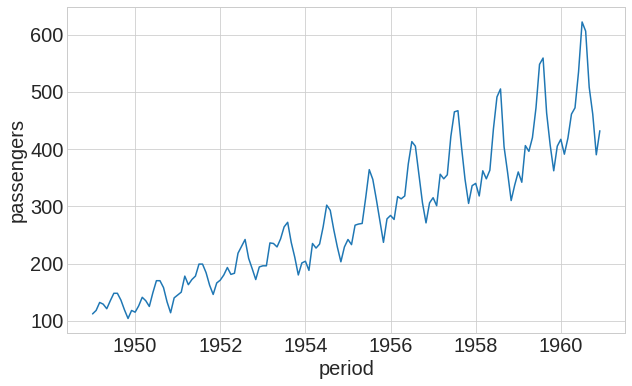

In [ ]:
sns.lineplot(x='period', y='passengers', data=passengers);

In [ ]:
scaler = StandardScaler()
scaler.fit(passengers)
df_scaled = scaler.transform(passengers)

In [ ]:
X = df_scaled[:, 0]
y = df_scaled[:, 1]

Text(0.5, 0, 'period')

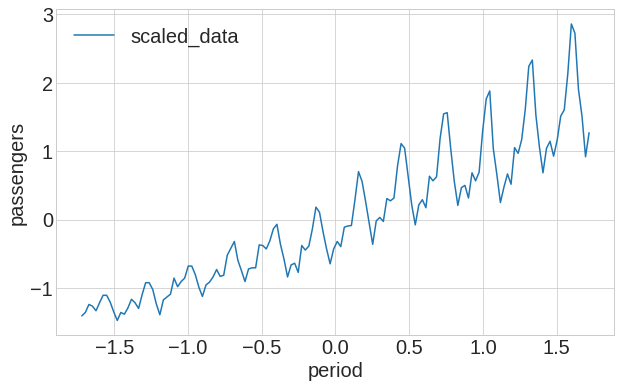

In [ ]:
sns.lineplot(x=X, y=y, label='scaled_data')
plt.ylabel('passengers')
plt.xlabel('period')

In [ ]:
train_ratio = 0.9
train_size = int(len(passengers) * train_ratio)
test_size = 1 - train_size

In [ ]:
X_train = X[:train_size]
y_train = y[:train_size]
X_test = X[train_size:]
y_test = y[train_size:]

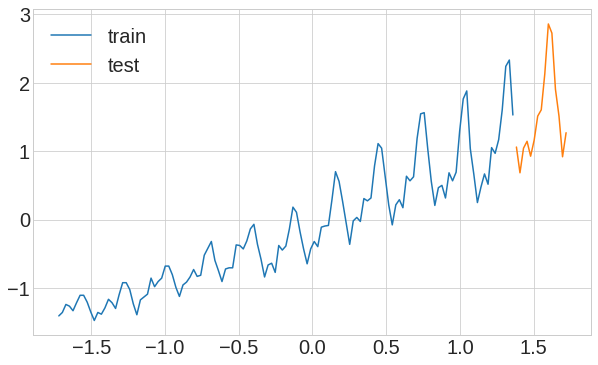

In [ ]:
sns.lineplot(x=X_train, y=y_train, label='train')
sns.lineplot(x=X_test, y=y_test, label='test');

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(
  Dense(1, input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False)
)

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, y_train)

5/5 [==============================] - 0s 2ms/step - loss: 0.1285


In [ ]:
y_predict = regressor.predict(X_train)

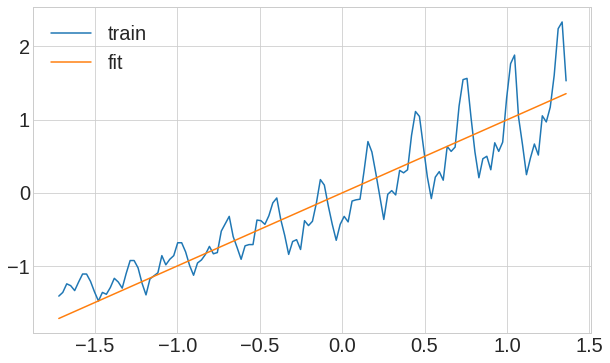

In [ ]:
sns.lineplot(x=X_train, y=y_train, label='train')
sns.lineplot(x=X_train, y=y_predict[:, 0], label='fit');

In [ ]:
d = {
    'time': X_train,
    'passengers': y_predict[:,0]
}

In [ ]:
results = pd.DataFrame(data=d)

In [ ]:
results

,time,passengers
0,-1.720064,-1.712907
1,-1.696007,-1.688951
2,-1.671950,-1.664994
3,-1.647894,-1.641037
4,-1.623837,-1.617080
...,...,...
124,1.262984,1.257729
125,1.287041,1.281686
126,1.311098,1.305643
127,1.335155,1.329599


In [ ]:
transformed_results = scaler.inverse_transform(results)

In [ ]:
transformed_results = pd.DataFrame(transformed_results)

In [ ]:
transformed_results.columns = passengers.columns

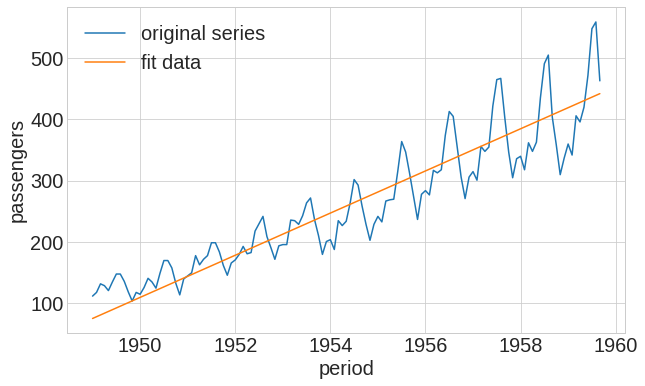

In [ ]:
sns.lineplot(x='period', y='passengers', data=passengers[:train_size], label='original series')
sns.lineplot(x='period', y='passengers', data=transformed_results, label='fit data');

In [ ]:
y_predict_test = regressor.predict(X_test)

In [ ]:
d = {
    'time': X_test,
    'passengers': y_predict_test[:,0]
}
test_results = pd.DataFrame(data=d)
transformed_test_results = scaler.inverse_transform(test_results)
transformed_test_results = pd.DataFrame(transformed_test_results)
transformed_test_results.columns = passengers.columns

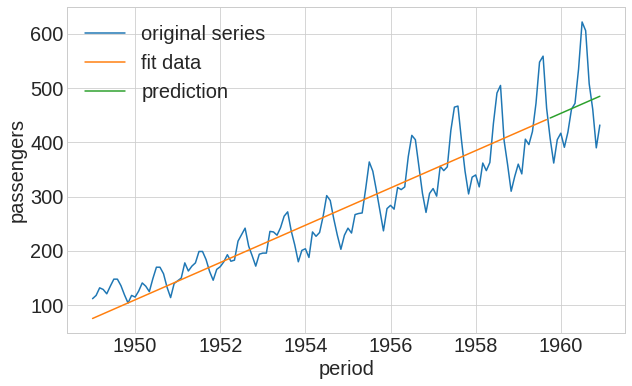

In [ ]:
sns.lineplot(x='period', y='passengers', data=passengers, label='original series')
sns.lineplot(x='period', y='passengers', data=transformed_results, label='fit data')
sns.lineplot(x='period', y='passengers', data=transformed_test_results, label='prediction');

In [ ]:
regressor_2 = Sequential()

regressor_2.add(
  Dense(8, input_dim=1, kernel_initializer='random_uniform',activation='sigmoid', use_bias=False)
)
regressor_2.add(
  Dense(8, kernel_initializer='random_uniform',activation='sigmoid', use_bias=False)
)
regressor_2.add(
  Dense(1, kernel_initializer='random_uniform',activation='linear', use_bias=False)
)

In [ ]:
regressor_2.compile(
    loss='mean_squared_error', optimizer='adam'
)

regressor_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 8)                 8         
_________________________________________________________________
dense_13 (Dense)             (None, 8)                 64        
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', min_delta=0.000001)

In [ ]:
regressor_2.fit(X_train, y_train, epochs=200)

Epoch 1/200
5/5 [==============================] - 0s 3ms/step - loss: 0.6509
Epoch 2/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6495
Epoch 3/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6480
Epoch 4/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6465
Epoch 5/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6448
Epoch 6/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6430
Epoch 7/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6412
Epoch 8/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6397
Epoch 9/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6383
Epoch 10/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6364
Epoch 11/200
5/5 [==============================] - 0s 1ms/step - loss: 0.6349
Epoch 12/200
5/5 [==============================] - 0s 2ms/step - loss: 0.6333
Epoch 13/200
5/5 [==============================] - 0s 2ms/st

In [ ]:
y_predict = regressor_2.predict(X_train)
y_predict_test = regressor_2.predict(X_test)

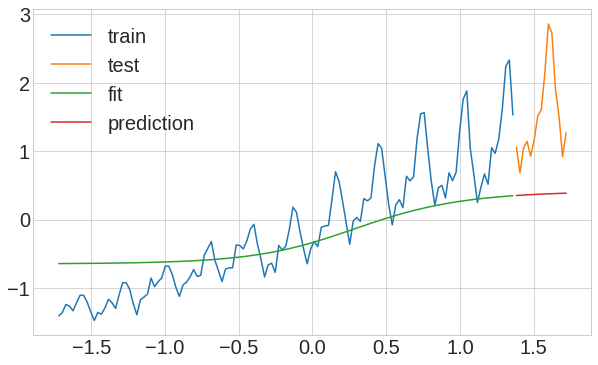

In [ ]:
sns.lineplot(x=X_train, y=y_train, label='train')
sns.lineplot(x=X_test, y=y_test, label='test')
sns.lineplot(x=X_train, y=y_predict[:, 0], label='fit')
sns.lineplot(x=X_test, y=y_predict_test[:, 0], label='prediction');

## Using lagged passenger time series to predict passengers

In [ ]:
import numpy as np

def lag_data(vector, n_steps):
  X, y = [], []

  for i in range(n_steps, vector.shape[0]):
    X.append(list(vector.loc[i-n_steps:i-1]))
    y.append(vector.loc[i])
  X, y = np.array(X), np.array(y)
  return X, y

### Using 1 lag

In [ ]:
vector = pd.DataFrame(y_train)[0]

In [ ]:
X_train_lag, y_train_lag = lag_data(vector, 1)

In [ ]:
pd.DataFrame(X_train_lag, y_train_lag).reset_index().rename(columns={'index': 'X_train', 0: 'y_train'})

,X_train,y_train
0,-1.357590,-1.407779
1,-1.240483,-1.357590
2,-1.265578,-1.240483
3,-1.332496,-1.265578
4,-1.215389,-1.332496
...,...,...
123,1.168570,0.967815
124,1.603538,1.168570
125,2.239260,1.603538
126,2.331272,2.239260


In [ ]:
vector_2 = pd.DataFrame(y_test)[0]
X_test_lag, y_test_lag = lag_data(vector_2, 1)

In [ ]:
pd.DataFrame(X_test_lag, y_test_lag).reset_index().rename(columns={'index': 'X_test', 0: 'y_test'})

,X_test,y_test
0,0.683413,1.059828
1,1.043098,0.683413
2,1.143475,1.043098
3,0.925991,1.143475
4,1.160205,0.925991
5,1.511525,1.160205
6,1.603538,1.511525
7,2.130518,1.603538
8,2.858253,2.130518
9,2.724417,2.858253


In [ ]:
regressor_3 = Sequential()

regressor_3.add(
  Dense(8, input_dim=1, kernel_initializer='ones', activation='linear', use_bias=False)
)
regressor_3.add(
  Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False)
)
regressor_3.add(
  Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
)

In [ ]:
regressor_3.compile(optimizer='adam', loss='mean_squared_error')
regressor_3.fit(X_train_lag, y_train_lag, epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.8507
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7856
Epoch 3/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7416
Epoch 4/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7237
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7091
Epoch 6/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6891
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6636
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6380
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6130
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5823
Epoch 11/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5530
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5192
Epoch 13/100
4/4 [==============================] - 0s 2ms/st

In [ ]:
y_predict_lag = regressor_3.predict(X_train_lag)

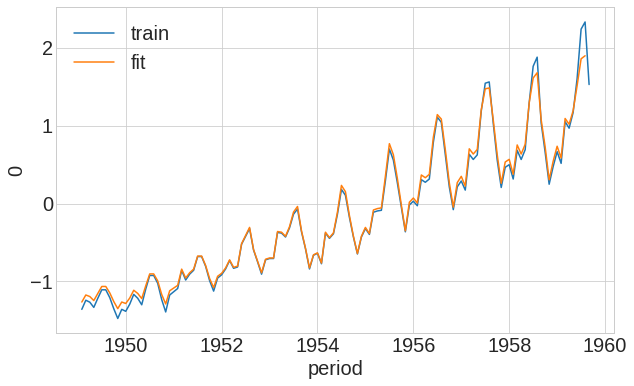

In [ ]:
sns.lineplot(x='period', y=y_train_lag, data=passengers[1:129], label='train')
sns.lineplot(x='period', y=pd.DataFrame(y_predict_lag)[0], data=passengers[1:129], label='fit')

In [ ]:
y_predict_test_lag = regressor_3.predict(X_test_lag)
results = pd.DataFrame(y_predict_test_lag)[0]

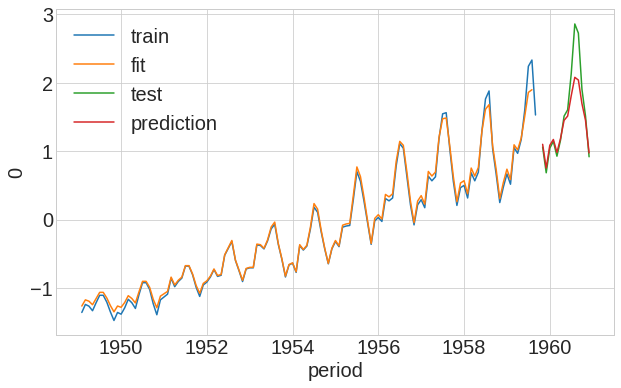

In [ ]:
sns.lineplot(x='period', y=y_train_lag, data=passengers[1:129], label='train')
sns.lineplot(x='period', y=pd.DataFrame(y_predict_lag)[0], data=passengers[1:129], label='fit')
plt.plot(passengers[130:144]['period'], pd.DataFrame(X_test_lag)[0], label='test')
sns.lineplot(x='period', y=results.values, data=passengers[130:144], label='prediction');

### Using 4 lags

In [ ]:
X_train_lag, y_train_lag = lag_data(vector, 4)
X_test_lag, y_test_lag = lag_data(vector_2, 4)

In [ ]:
regressor_4 = Sequential()


regressor_4.add(
  Dense(8, input_dim=4, kernel_initializer='ones', activation='linear', use_bias=False)
)
regressor_4.add(
  Dense(64, kernel_initializer='random_uniform', activation='sigmoid', use_bias=False)
)
regressor_4.add(
  Dense(1, kernel_initializer='random_uniform', activation='linear', use_bias=False)
)

regressor_4.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
regressor_4.fit(X_train_lag, y_train_lag, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7363
Epoch 2/300
4/4 [==============================] - 0s 2ms/step - loss: 0.6623
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5969
Epoch 4/300
4/4 [==============================] - 0s 2ms/step - loss: 0.5297
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.4620
Epoch 6/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3956
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.3344
Epoch 8/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2766
Epoch 9/300
4/4 [==============================] - 0s 2ms/step - loss: 0.2322
Epoch 10/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1951
Epoch 11/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1689
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 0.1551
Epoch 13/300
4/4 [==============================] - 0s 2ms/st

In [ ]:
y_predict_lag = regressor_4.predict(X_train_lag)
train_results = pd.DataFrame(y_predict_lag)[0]
y_predict_test_lag = regressor_4.predict(X_test_lag)
results = pd.DataFrame(y_predict_test_lag)[0]

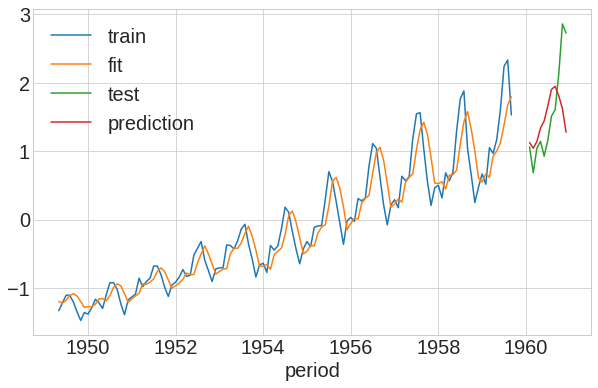

In [ ]:
sns.lineplot(x='period', y=y_train_lag, data=passengers[4:129], label='train')
sns.lineplot(x='period', y=train_results.values, data=passengers[4:129], label='fit')
plt.plot(passengers[133:144]['period'], pd.DataFrame(X_test_lag)[0], label='test')
sns.lineplot(x='period', y=results.values, data=passengers[133:144], label='prediction');